# Bank Marketing

#### Abstract: 

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


#### Data Set Information: 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Attribute Information:

#### Bank client data:

* Age (numeric)

* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:

* Contact: contact communication type (categorical: 'cellular','telephone')

* Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:

* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* Previous: number of contacts performed before this campaign and for this client (numeric)

* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes

* Emp.var.rate: employment variation rate - quarterly indicator (numeric)

* Cons.price.idx: consumer price index - monthly indicator (numeric)

* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

* Euribor3m: euribor 3 month rate - daily indicator (numeric)

* Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: 'yes', 'no')



#### Analysis Steps:
* Atribute information Analysis.

* Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Naive Bayes)

* Deep Learning (ANN)

#### Source:

* Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
#
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#
from sklearn.pipeline import Pipeline
#
from sklearn.utils import resample

#### Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading the DataSample

In [2]:
df_bank = pd.read_csv('bank-additional-full.csv',delim_whitespace=False,sep=';')
#display first five rows in the DataFrame
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Drop Column Duration as suggested

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [3]:
df_bank = df_bank.drop(['duration'],axis=1)
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### View the structure of the dataset

In [4]:
# shape
print("Shape:")
print(df_bank.shape)
print()
print("Dataset info:")
print()
print(df_bank.info())

Shape:
(41188, 20)

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 

#### Check for null values if any

In [5]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Hence determined that the dataset provided has no null  values

#### Check how well the label y is distributed


In [6]:
df_bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

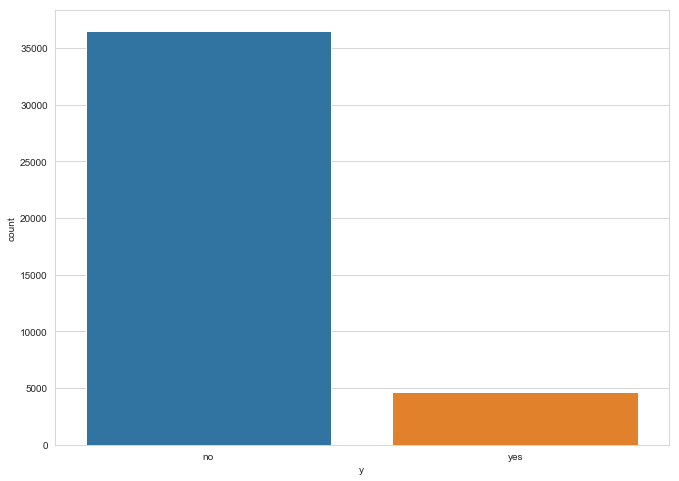

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.countplot('y',data=df_bank)

In [8]:
np.round((df_bank[df_bank['y'] == 'yes']['y'].count() / df_bank.shape[0] *100),2)

11.27

In [9]:
print('Total Percentage of client subscribed to term deposit {} % of the entire client base'.format(np.round((df_bank[df_bank['y'] == 'yes']['y'].count() / df_bank.shape[0] *100),2)))

Total Percentage of client subscribed to term deposit 11.27 % of the entire client base


#### Plotting some categorical variables

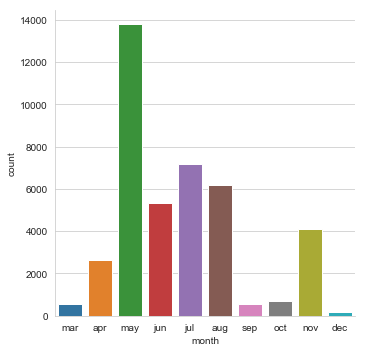

In [13]:
# show feature month - last contact month of year and count it
sns.catplot(x='month',kind='count',data=df_bank, order=["mar", "apr", "may", "jun", "jul", "aug", "sep","oct", "nov",
                   "dec"])

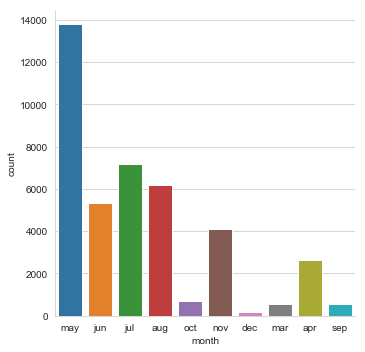

In [14]:
sns.catplot(x='month',kind='count',data=df_bank)

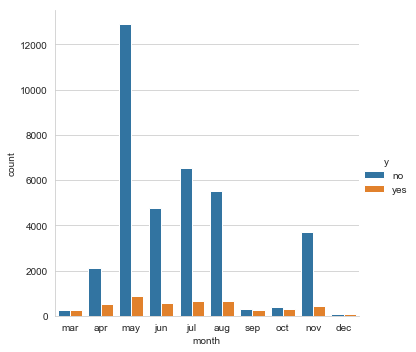

In [15]:
# count subscribed deposit per month
sns.catplot(x='month',kind='count',hue='y',data=df_bank, order=["mar", "apr", "may", "jun", "jul", "aug", "sep","oct", "nov",
                   "dec"])

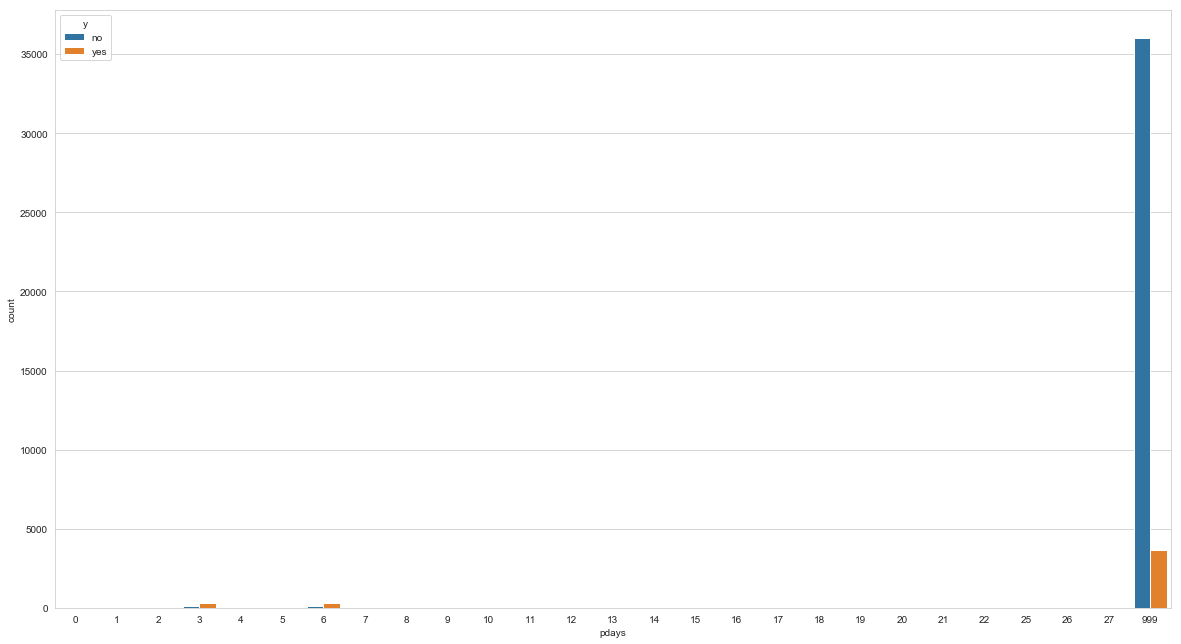

In [18]:
# pdays: number of days that passed by after the client was 
# last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# count y
plt.figure(figsize=(20,11))
sns.countplot(x="pdays", hue="y", data=df_bank)

It seems to me that the variable "month" and "day_of_week" have no relevance for the prediction. For some reason, many calls were made in May. Most calls were made for the first time (999).

In [19]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#### Prepare Data
new_df = df_bank.copy()